In [1]:
# 소비데이터불러오기

# 선언
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

In [ ]:
# %pwd

In [ ]:
# %ls data\*.xlsx

In [3]:
card = 'data\p_card4.xlsx'

In [4]:
card_df = pd.read_excel(card, sheet_name = '데이터',engine='openpyxl')
card_df.head()

,통계표,지역코드,소비유형코드,금액구분코드,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,총액,백만원,원자료,44936072,38921767,44496876,43591233,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608
1,7.5.2. 지역별 소비유형별 개인 신용카드,전국,합계,월간 일평균,백만원,원자료,1449551,1390063,1435383,1453041,...,1652244,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629
2,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,총액,백만원,원자료,6717820,6046211,6697911,6616299,...,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129
3,7.5.2. 지역별 소비유형별 개인 신용카드,전국,종합소매,월간 일평균,백만원,원자료,216704,215936,216062,220543,...,239864,229936,225889,235818,249490,238870,250262,235457,246281,223755
4,7.5.2. 지역별 소비유형별 개인 신용카드,전국,백화점,총액,백만원,원자료,1259884,1145085,1351477,1279599,...,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777


In [ ]:
# len(card_df)

In [ ]:
# card_df.info()

In [ ]:
# null 값 확인
# 열별
# card_df.isnull().sum()

In [ ]:
# 행별
# card_df.isnull().sum(1)

In [5]:
# 필요없는 컬럼 삭제

del card_df['통계표']
del card_df['변환'] 
# 단위는 백만원이다.
del card_df['단위'] 
card_df

#두칸 공백이 있으면 소분류이다.

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,51219562,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1652244,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7435797,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,239864,229936,225889,235818,249490,238870,250262,235457,246281,223755
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1550293,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,298,306,435,326,421,341,254,289,402,301
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,11433,11404,12081,10616,11013,10427,9347,10863,9708,9109
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,369,380,390,342,367,336,312,350,313,325
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,11466,11373,13168,10204,11005,9802,10007,9944,11564,8890


In [6]:
# 소분류, 대분류 붙이기

merc = list()

for x in range(len(card_df)):
    if len(card_df['소비유형코드'][x].split(' '))==1:
        merc.append('대분류')
    else: 
        merc.append('소분류')
        
merc

['대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '대분류',
 '대분류',
 '소분류',
 '소분류',
 '소분류',
 '소분류',
 '대분류',
 '대분류',
 '소분류',


In [7]:
len(merc)

1476

In [8]:
# 원래 DataFrame에 붙이기
card_df['대소분류구분'] = merc
card_df

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1673664,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,229936,225889,235818,249490,238870,250262,235457,246281,223755,대분류
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,306,435,326,421,341,254,289,402,301,소분류
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,11404,12081,10616,11013,10427,9347,10863,9708,9109,대분류
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,380,390,342,367,336,312,350,313,325,대분류
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,11373,13168,10204,11005,9802,10007,9944,11564,8890,대분류


In [10]:
# 전국 데이터로 코로나 전,후 기간 나누기 및 정하기
area_seg = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드=='합계')#특정조건만
card_all = card_df[area_seg]
card_all

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,50209911,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류


In [ ]:
# card_all : 기간별 합계
# case1 : 년도별 합계 -> 연도로 나눈다.

In [11]:
# 2019/01 ~ 2019/12  = [3] ~ [15]  #코로나 전
# 2020/01 ~ 2020/12  = [15] ~ [27] #코로나 기간
# 2021/01 ~ 2021/12  = [27] ~ [39] #코로나 후 +1
# 2022/01 ~ 2022/02  = [39] ~ [41] #코로나 후 +2

# card_all.iloc[:,39:41]

card_all_2019 = card_all.iloc[:,3:15] 
card_all['2019'] = card_all_2019.sum(axis=1)
 
card_all_2020 = card_all.iloc[:,15:27] 
card_all['2020'] = card_all_2020.sum(axis=1)

card_all_2021 = card_all.iloc[:,27:39] 
card_all['2021'] = card_all_2021.sum(axis=1)

card_all_2022 = card_all.iloc[:,39:41] 
card_all['2022'] = card_all_2022.sum(axis=1)

card_all

C:\Users\student\AppData\Local\Temp\ipykernel_4592\858134217.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_all['2019'] = card_all_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_4592\858134217.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_all['2020'] = card_all_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_4592\858134217.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,53469616,53827378,53993508,54539492,47029608,대분류,538807655,550072383,605221466,101569100


In [12]:
# 업종 대분류별 증감
# 증감율 : 코로나 1차 (2020년 - 2019년) / 2019년
# 대분류 업종별, 전국 매출액
merc_seg = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='대분류') #특정조건만
card_merc = card_df[merc_seg]
card_merc

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,6898086,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,11332876,11921832,11762070,11733727,12498677,12988975,13200630,13162164,11902937,대분류
16,전국,식료품,총액,838711,778584,703205,697603,760900,709244,679288,...,843926,852405,921161,1265704,977925,975218,1001439,1285590,798669,대분류
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,1031048,952645,847157,1008459,1210118,1139854,1082268,977024,793406,대분류
32,전국,연료,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,...,2607119,2801180,2728556,2627140,2928012,3007486,3004262,2946530,2632130,대분류
34,전국,가구/가전,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,...,1328889,1517272,1383383,1184915,1306848,1301222,1152933,1283768,1187513,대분류
40,전국,의료/보건,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,...,3825910,3941412,3741396,3549924,4033402,3879853,4095031,4183821,3652065,대분류
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,3055501,3010513,2546455,2322181,2757606,2862530,2996016,2326235,2321611,대분류
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,660371,577479,545371,584841,697987,771992,620872,642424,539946,대분류
62,전국,오락/문화,총액,1190510,1101948,1450682,1369465,1497833,1405616,1386808,...,1427493,1345177,1274088,1369642,1574476,1484822,1272392,1133765,1020406,대분류


In [13]:
card_merc_2019 = card_merc.iloc[:,3:15] 
card_merc['2019'] = card_merc_2019.sum(axis=1)
 
card_merc_2020 = card_merc.iloc[:,15:27] 
card_merc['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = card_merc.iloc[:,27:39] 
card_merc['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = card_merc.iloc[:,39:41] 
card_merc['2022'] = card_merc_2022.sum(axis=1)

card_merc

C:\Users\student\AppData\Local\Temp\ipykernel_4592\3637948679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_4592\3637948679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_4592\3637948679.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,2019,2020,2021,2022
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7404979,7507863,7299173,7634707,6265129,대분류,81715140,79868221,85135882,13899836
14,전국,전자상거래/통신판매,총액,7595436,6670919,7741855,7495993,7817066,7285161,7836989,...,12498677,12988975,13200630,13162164,11902937,대분류,93396977,116325130,140920641,25065101
16,전국,식료품,총액,838711,778584,703205,697603,760900,709244,679288,...,977925,975218,1001439,1285590,798669,대분류,9245565,10266212,11354587,2084259
22,전국,의류/잡화,총액,1132901,1001630,1241781,1201059,1317136,1178323,1108101,...,1210118,1139854,1082268,977024,793406,대분류,14010886,11586564,12008740,1770430
32,전국,연료,총액,2507052,2216700,2524854,2504898,2716282,2583850,2566747,...,2928012,3007486,3004262,2946530,2632130,대분류,31078595,27031131,32051237,5578660
34,전국,가구/가전,총액,1262882,1163903,1430280,1268250,1428125,1230078,1313486,...,1306848,1301222,1152933,1283768,1187513,대분류,15099752,16095290,15790436,2471281
40,전국,의료/보건,총액,3633792,3066496,3487020,3368808,3528229,3373985,3492110,...,4033402,3879853,4095031,4183821,3652065,대분류,41557715,41788064,45243818,7835886
46,전국,자동차,총액,2195702,1956543,2575204,2463015,2478845,2256471,2321229,...,2757606,2862530,2996016,2326235,2321611,대분류,28502158,34476890,33732074,4647846
54,전국,여행/교통,총액,1247162,1047980,1110523,1168304,1188161,1120378,1244302,...,697987,771992,620872,642424,539946,대분류,13832202,6606730,7178093,1182370
62,전국,오락/문화,총액,1190510,1101948,1450682,1369465,1497833,1405616,1386808,...,1574476,1484822,1272392,1133765,1020406,대분류,16295958,14126877,15711387,2154171


In [14]:
# 코로나 1차 증감률 선정
card_merc['20증감률'] = ((card_merc['2020']-card_merc['2019'])/card_merc['2019'])*100
card_merc_order = card_merc.sort_values('20증감률')
card_minus_top3 = card_merc_order.head(3) #감소 top3
card_plus_top3 = card_merc_order.tail(3) #증가 top3

C:\Users\student\AppData\Local\Temp\ipykernel_4592\3098150622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  card_merc['20증감률'] = ((card_merc['2020']-card_merc['2019'])/card_merc['2019'])*100


In [15]:
# 감소업종 소분류 -> 소분류 data 중 대분류의 index 연속값, 다음 대분류전까지
merc_seg2 = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='소분류') #특정조건만
card_merc2 = card_df[merc_seg2]
card_merc2

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1332067,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류
6,전국,대형마트/유통전문점,총액,2656679,2402706,2609639,2551294,2790584,2776818,2897975,...,2845178,2968141,3102625,3108158,2928618,2988072,2923811,3165932,2575148,소분류
8,전국,슈퍼마켓,총액,1958044,1746519,1870629,1892572,1969621,1727120,1748047,...,1757707,1856760,1931481,1910003,1763608,1762762,1775922,1942293,1565735,소분류
10,전국,편의점,총액,661708,588642,688378,708420,773933,775828,820703,...,908153,941240,963941,940574,938808,913325,896891,873099,792786,소분류
12,전국,면세점,총액,181505,163259,177788,184414,188463,194646,215363,...,54982,41115,42612,40624,53155,62887,51568,48982,44683,소분류
18,전국,일반식료품,총액,757030,708538,638752,633441,682870,643380,615617,...,784889,791647,864371,1166284,907297,912625,938827,1200656,751097,소분류
20,전국,건강보조식품,총액,81680,70046,64453,64162,78030,65864,63671,...,59037,60757,56790,99421,70628,62593,62612,84934,47572,소분류
24,전국,의복/직물,총액,595790,524598,657957,651190,723368,615586,566552,...,550783,472689,395108,530767,703341,676926,587632,505617,400477,소분류
26,전국,복식잡화,총액,90256,79194,103978,99942,110520,104620,99119,...,95845,91459,83440,91523,107127,99381,99368,89593,73215,소분류
28,전국,시계/귀금속/안경,총액,201638,187289,227925,211259,232816,217216,211331,...,190353,196858,196371,198186,205314,178661,195287,195055,168290,소분류


In [17]:
# for문으로 대분류 소비유형코드 붙이기

merc_dae = list()

for x in range(len(card_df)):
    if card_df['대소분류구분'][x]=='대분류':
        merc_dae.append(card_df['소비유형코드'][x])
    else: 
        merc_dae.append(np.nan)
        
# 오류시 앞의 값으로 채워넣기
card_df['대분류'] = merc_dae
card_df = card_df.fillna(method='ffill')


In [18]:
card_df

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,대소분류구분,대분류
0,전국,합계,총액,44936072,38921767,44496876,43591233,46109266,43594544,46211620,...,52583282,50076065,50710469,53469616,53827378,53993508,54539492,47029608,대분류,합계
1,전국,합계,월간 일평균,1449551,1390063,1435383,1453041,1487396,1453151,1490697,...,1696235,1615357,1690349,1724826,1794246,1741726,1759338,1679629,대분류,합계
2,전국,종합소매,총액,6717820,6046211,6697911,6616299,7113120,6691472,6898126,...,7002567,7310362,7484689,7404979,7507863,7299173,7634707,6265129,대분류,종합소매
3,전국,종합소매,월간 일평균,216704,215936,216062,220543,229455,223049,222520,...,225889,235818,249490,238870,250262,235457,246281,223755,대분류,종합소매
4,전국,백화점,총액,1259884,1145085,1351477,1279599,1390518,1217059,1216038,...,1195312,1269703,1485330,1720790,1780818,1650980,1604401,1286777,소분류,종합소매
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,기타,공과금/개인 및 전문 서비스,월간 일평균,545,442,426,425,565,404,526,...,435,326,421,341,254,289,402,301,소분류,숙박/음식
1472,기타,금융/보험,총액,14083,12629,15079,13141,14256,13391,13580,...,12081,10616,11013,10427,9347,10863,9708,9109,대분류,금융/보험
1473,기타,금융/보험,월간 일평균,454,451,486,438,460,446,438,...,390,342,367,336,312,350,313,325,대분류,금융/보험
1474,기타,기타,총액,17491,13730,15801,15987,16291,15670,17030,...,13168,10204,11005,9802,10007,9944,11564,8890,대분류,기타


In [26]:
# 증가 top3 세부업종

card_df_detail = (card_df.지역코드=='전국') & (card_df.금액구분코드=='총액') & (card_df.소비유형코드!='합계') & (card_df.대소분류구분=='소분류') #특정조건만
card_df_detail = card_df[card_df_detail]
# card_df_detail
plus_top3_merc = card_plus_top3['소비유형코드']
# plus_top3_merc
plus_top3_detail = card_df_detail[card_df_detail['대분류'].isin(plus_top3_merc)]
# plus_top3_detail 
# 금융/보험, 전자상거래/통신판매 상세업종 없음

# card_merc_chk = plus_top3_detail.iloc[:,3:15] 
# card_merc_chk

# 년 합계와 증감률
card_merc_2019 = plus_top3_detail.iloc[:,3:15] 
plus_top3_detail['2019'] = card_merc_2019.sum(axis=1)

card_merc_2020 = plus_top3_detail.iloc[:,15:27] 
plus_top3_detail['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = plus_top3_detail.iloc[:,27:39] 
plus_top3_detail['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = plus_top3_detail.iloc[:,39:41] 
plus_top3_detail['2022'] = card_merc_2022.sum(axis=1)

plus_top3_detail['20증감률'] = ((plus_top3_detail['2020']-plus_top3_detail['2019'])/plus_top3_detail['2019'])*100
plus_top3_detail_order = plus_top3_detail.sort_values('20증감률')
plus_top3_detail_order


C:\Users\student\AppData\Local\Temp\ipykernel_4592\3173281757.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_top3_detail['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_4592\3173281757.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plus_top3_detail['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_4592\3173281757.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
52,전국,자동차 부품 및 정비,총액,656929,544215,681062,644660,722601,686956,698826,...,829157,735397,567042,소분류,자동차,8225209,8222826,8774448,1302439,-0.028972
50,전국,기타운송수단,총액,114577,109905,149628,131219,144308,143844,136759,...,146693,132037,135860,소분류,자동차,1593976,1764940,2065284,267897,10.725632
48,전국,국산자동차신품,총액,1424196,1302423,1744513,1687136,1611936,1425672,1485645,...,2020166,1458802,1618709,소분류,자동차,18682974,24489123,22892345,3077511,31.077220


In [27]:
# 감소 top3 세부업종
minus_top3_merc = card_minus_top3['소비유형코드']
# minus_top3_merc
minus_top3_detail = card_df_detail[card_df_detail['대분류'].isin(minus_top3_merc)]
minus_top3_detail # 교육상세 없음

# 년 합계와 증감률
card_merc_2019 = minus_top3_detail.iloc[:,3:15] 
minus_top3_detail['2019'] = card_merc_2019.sum(axis=1)

card_merc_2020 = minus_top3_detail.iloc[:,15:27] 
minus_top3_detail['2020'] = card_merc_2020.sum(axis=1)

card_merc_2021 = minus_top3_detail.iloc[:,27:39] 
minus_top3_detail['2021'] = card_merc_2021.sum(axis=1)

card_merc_2022 = minus_top3_detail.iloc[:,39:41] 
minus_top3_detail['2022'] = card_merc_2022.sum(axis=1)

minus_top3_detail['20증감률'] = ((minus_top3_detail['2020']-minus_top3_detail['2019'])/minus_top3_detail['2019'])*100
minus_top3_detail_order = minus_top3_detail.sort_values('20증감률')
minus_top3_detail_order


C:\Users\student\AppData\Local\Temp\ipykernel_4592\2175401771.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_top3_detail['2019'] = card_merc_2019.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_4592\2175401771.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minus_top3_detail['2020'] = card_merc_2020.sum(axis=1)
C:\Users\student\AppData\Local\Temp\ipykernel_4592\2175401771.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,지역코드,소비유형코드,금액구분코드,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,...,2021/12,2022/01,2022/02,대소분류구분,대분류,2019,2020,2021,2022,20증감률
58,전국,항공사,총액,503956,423982,443476,445981,447640,419248,471606,...,58738,100970,90588,소분류,여행/교통,5100336,687330,1062213,191558,-86.523829
56,전국,여행사/자동차임대,총액,172400,116224,119684,121724,130416,121937,151500,...,39283,41570,37589,소분류,여행/교통,1531625,478723,466608,79159,-68.744112
60,전국,대중교통,총액,570806,507773,547363,600598,610105,579192,621196,...,522851,499884,411769,소분류,여행/교통,7200239,5440675,5649270,911653,-24.437578
24,전국,의복/직물,총액,595790,524598,657957,651190,723368,615586,566552,...,587632,505617,400477,소분류,의류/잡화,7529614,6150161,6404847,906094,-18.320368
30,전국,화장품,총액,245217,210548,251921,238668,250431,240902,231100,...,199981,186759,151425,소분류,의류/잡화,2824093,2349868,2226572,338184,-16.792117
28,전국,시계/귀금속/안경,총액,201638,187289,227925,211259,232816,217216,211331,...,195287,195055,168290,소분류,의류/잡화,2474610,2061175,2281498,363345,-16.707077
26,전국,복식잡화,총액,90256,79194,103978,99942,110520,104620,99119,...,99368,89593,73215,소분류,의류/잡화,1182568,1025358,1095825,162808,-13.293950


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


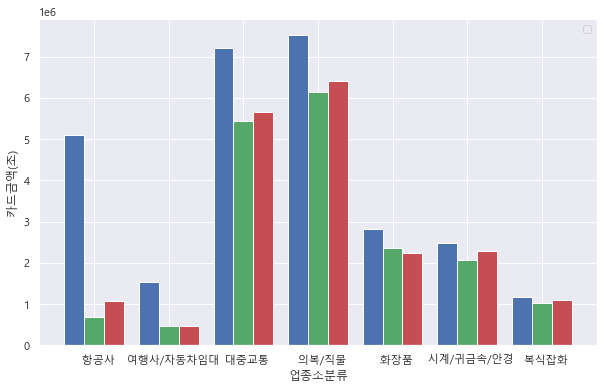

In [41]:
# 막대차트로 2019,2020,2021 그리기
# 반복자 enumerate 는 현재 행과 해당 첨자를 둘 다 반환

# import numpy as np
# import matplotlib.pyplot as plt

data = [minus_top3_detail_order['2019'],
        minus_top3_detail_order['2020'],
        minus_top3_detail_order['2021']]

# X = np.arange(7)
# # X = minus_top3_detail_order['소비유형코드']
# plt.bar(X + 0.00, data[0], color='b', width=0.25)
# plt.bar(X + 0.25, data[1], color='g', width=0.25)
# plt.bar(X + 0.50, data[2], color='r', width=0.25)

color_list = ['b', 'g', 'r']

gap = .8 / len(data)
for i, row in enumerate(data):
    X = np.arange(len(row))
    plt.bar(X + i*gap, row, 
           width = gap, 
           color = color_list[i % len(color_list)])
    
plt.xlabel('업종소분류')
plt.ylabel('카드금액(조)')    
plt.legend()

plt.xticks(X + gap, minus_top3_detail_order['소비유형코드'])

plt.show()